# Phase-3 Handling Outliers

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings;
warnings.filterwarnings("ignore")
import re
pd.set_option("display.max_columns",None)

In [2]:
auto = pd.read_csv('missings_filled_step2.csv')
df = auto.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               15919 non-null  object 
 1   body_type                15919 non-null  object 
 2   price                    15919 non-null  int64  
 3   vat                      15919 non-null  object 
 4   km                       15919 non-null  float64
 5   age                      15919 non-null  float64
 6   prev_owner               15919 non-null  float64
 7   hp                       15919 non-null  float64
 8   Type                     15919 non-null  object 
 9   Inspection new           15919 non-null  object 
 10  Warranty(months)         15919 non-null  float64
 11  Body Color               15919 non-null  object 
 12  Paint Type               15919 non-null  object 
 13  Upholstery               12199 non-null  object 
 14  Nr. of Doors          

### Column 2: Price

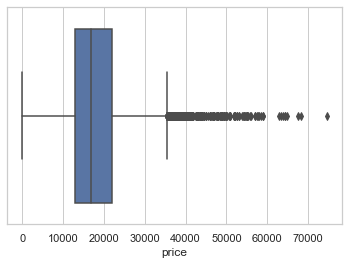

In [4]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["price"])

In [5]:
df.describe()

,price,km,age,prev_owner,hp,Warranty(months),Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,CO2 Emission(g CO2/km),Gears,Consumption_combined,Consumption_city,Consumption_country
count,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,13483.000000,13543.000000
mean,18019.896727,31979.540706,1.389786,1.537220,88.385012,6.684654,4.660657,4.952258,1426.641498,3.785162,1343.689616,117.583579,5.939820,4.879594,5.946525,4.238381
std,7386.169409,37057.442117,1.121257,66.033365,26.840402,13.330917,0.642198,0.476599,313.985143,0.419201,211.579031,19.966895,0.791983,1.556867,1.963529,1.194091
min,13.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,12850.000000,1989.000000,0.000000,1.000000,66.000000,0.000000,4.000000,5.000000,1229.000000,4.000000,1163.000000,104.000000,5.000000,4.100000,4.700000,3.700000
50%,16900.000000,20413.000000,1.000000,1.000000,85.000000,0.000000,5.000000,5.000000,1461.000000,4.000000,1279.000000,117.000000,6.000000,4.800000,5.800000,4.200000
75%,21900.000000,46898.500000,2.000000,1.000000,101.000000,12.000000,5.000000,5.000000,1598.000000,4.000000,1485.000000,128.000000,6.000000,5.400000,7.000000,4.600000
max,74600.000000,317000.000000,3.000000,8294.000000,294.000000,72.000000,7.000000,7.000000,16000.000000,8.000000,2471.000000,990.000000,50.000000,55.000000,66.000000,44.000000


In [6]:
df.drop((df[df.price < 4000].price.index), axis=0, inplace=True)

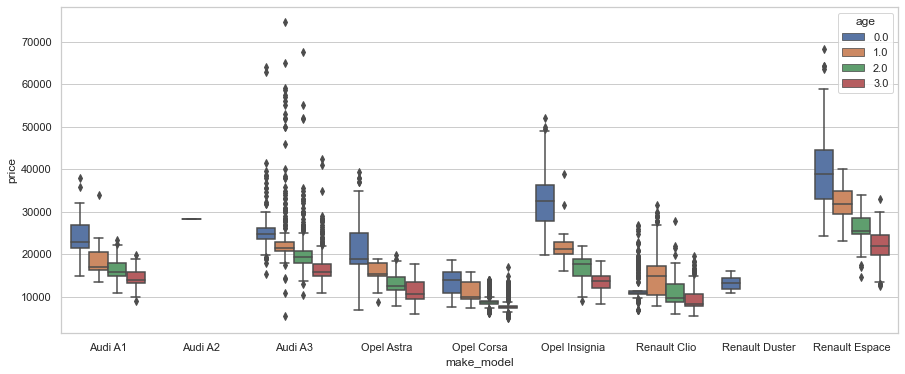

In [7]:
plt.figure(figsize=(15,6))
sns.boxplot(y='price',data=df, x='make_model', hue='age');

### Column : km

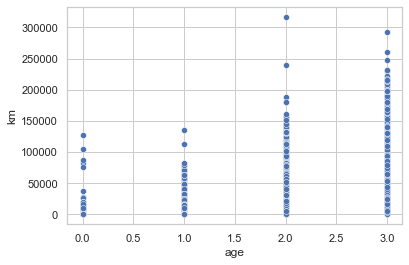

In [8]:
sns.scatterplot(data=df, x="age", y="km");

### Column: pre_owner

In [9]:
df.prev_owner.value_counts(dropna=False)

1.0       15188
0.0         722
778.0         1
8294.0        1
17.0          1
2.0           1
188.0         1
Name: prev_owner, dtype: int64

### Column: hp

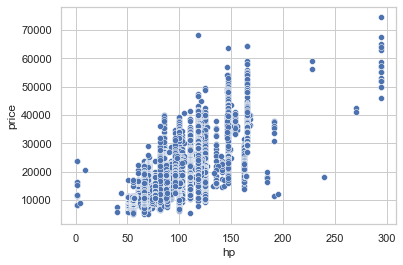

In [13]:
sns.scatterplot(data=df, x="hp", y="price");

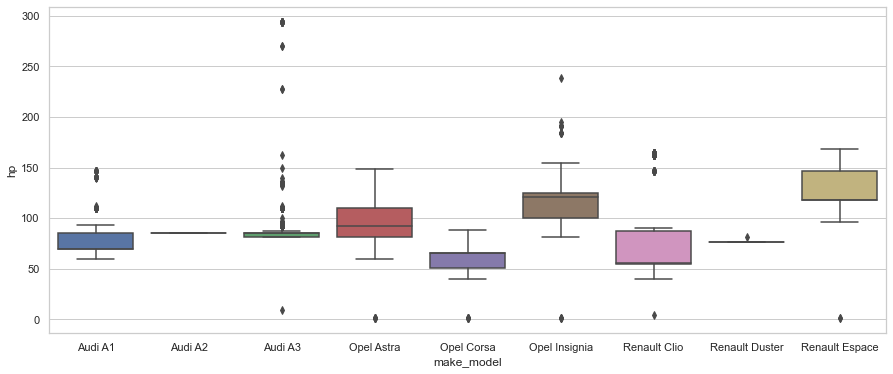

In [10]:
plt.figure(figsize=(15,6))
sns.boxplot(y='hp',data=df, x='make_model');

In [45]:
df[df['hp'] < 50].hp.value_counts(dropna=False)

1.0     20
40.0     2
44.0     1
4.0      1
9.0      1
Name: hp, dtype: int64

In [46]:
df.loc[df['hp']<50,'hp'] = np.nan

* hp values less than 50 were converted to null values.

In [48]:
mode_hp = df.groupby(['make_model','body_type','Displacement'])['hp']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

df["hp"] = df["hp"].fillna(mode_hp)

mode_hp1 = df.groupby(['make_model','Displacement'])['hp']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

df["hp"] = df["hp"].fillna(mode_hp1)

mode_hp2 = df.groupby(['make_model','body_type'])['hp']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

df["hp"] = df["hp"].fillna(mode_hp2)

* Then null values were refilled according to the columns 'make_model','body_type','displacement'

### Column: Warranty(months)

In [52]:
df['Warranty(months)'].value_counts(dropna=False)

0.0     11062
12.0     2594
24.0     1118
60.0      401
36.0      279
48.0      149
6.0       125
72.0       59
3.0        33
23.0       11
18.0       10
20.0        7
25.0        6
2.0         5
50.0        4
26.0        4
16.0        4
19.0        3
1.0         3
4.0         3
13.0        3
34.0        3
45.0        2
14.0        2
17.0        2
11.0        2
46.0        2
28.0        2
21.0        2
22.0        2
9.0         2
30.0        1
33.0        1
56.0        1
40.0        1
7.0         1
15.0        1
8.0         1
10.0        1
49.0        1
47.0        1
65.0        1
Name: Warranty(months), dtype: int64

### Column: Nr. of Doors

In [53]:
df['Nr. of Doors'].value_counts(dropna=False)

5.0    11784
4.0     3079
3.0      831
2.0      219
7.0        1
1.0        1
Name: Nr. of Doors, dtype: int64

In [55]:
df[df['Nr. of Doors'] == 7.0]

,make_model,body_type,price,vat,km,registration,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight(kg),Drive chain,Fuel,CO2 Emission(g CO2/km),Emission Class,Comfort&Convenience,Entertainment&Media,Extras,Safety & Security,description,Gears,Consumption_combined
15202,Renault Espace,Van,21600,Price negotiable,78000.0,3.0,1.0,118.0,Used,No,0.0,Brown,Metallic,7.0,5.0,Automatic,1598.0,4.0,1734.0,front,Diesel,120.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'Digital radio', 'MP3', 'On-boar...","['Alloy wheels', 'Touch screen']","['ABS', 'Blind spot monitor', 'Central door lo...",[],6.0,4.6


In [59]:
df.loc[(df['make_model'] == 'Renault Espace') & (df['body_type'] == 'Van'), ['Nr. of Doors']].value_counts()

Nr. of Doors
5.0             712
4.0              90
7.0               1
dtype: int64

In [61]:
df.loc[df['Nr. of Doors']==1,'Nr. of Doors'] = 5

In [62]:
df.loc[df['Nr. of Doors']==7,'Nr. of Doors'] = 5

### Column: Nr. of Seats

In [63]:
df['Nr. of Seats'].value_counts(dropna=False)

5.0    14304
4.0     1127
7.0      362
2.0      119
6.0        2
3.0        1
Name: Nr. of Seats, dtype: int64

In [65]:
df[df['Nr. of Seats']==6]

,make_model,body_type,price,vat,km,registration,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight(kg),Drive chain,Fuel,CO2 Emission(g CO2/km),Emission Class,Comfort&Convenience,Entertainment&Media,Extras,Safety & Security,description,Gears,Consumption_combined
582,Audi A1,Compact,13500,VAT deductible,100000.000000,2.0,1.0,70.0,Used,No,12.0,White,Metallic,5.0,6.0,Manual,1000.0,4.0,1500.0,front,Benzine,111.0,Euro 6,['Air conditioning'],['On-board computer'],['Alloy wheels'],['ABS'],"['\nAUTO SPEZIAL CONCESIONARIO MULTI-MARCA ', ...",5.0,4.9
15890,Renault Espace,Station wagon,42490,VAT deductible,1144.411765,0.0,1.0,147.0,New,No,0.0,Black,Metallic,5.0,6.0,Automatic,1997.0,4.0,1840.0,front,Diesel,168.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Touch screen']","['ABS', 'Blind spot monitor', 'Central door lo...","['\n', 'Wir freuen uns über Ihr Interesse am h...",6.0,5.7


In [66]:
df.loc[df['Nr. of Seats']==3,'Nr. of Seats'] = 4

### Column: Displacement

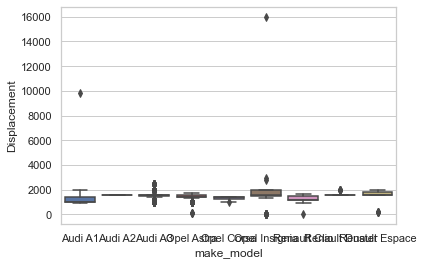

In [11]:
sns.boxplot(y='Displacement',data=df, x='make_model');

In [12]:
df[df.Displacement > 5000].Displacement = 1600

In [13]:
df[df.Displacement < 600].Displacement = np.nan

In [14]:
mode_disp = df.groupby(['make_model','body_type','hp'])['Displacement']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

df["Displacement"] = df["Displacement"].fillna(mode_disp)

* displacemet values greater than 5000 and less than 600 were converted to null and they were filled according to the groups make_model, body_type and hp.

### Column: Cylinders

<AxesSubplot:xlabel='make_model', ylabel='Cylinders'>

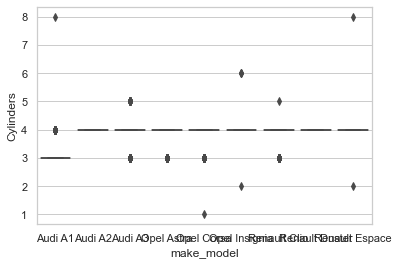

In [15]:
sns.boxplot(y='Cylinders',data=df, x='make_model')

In [16]:
df.Cylinders.value_counts(dropna=False)

4.0    12438
3.0     3447
5.0       22
6.0        3
2.0        2
8.0        2
1.0        1
Name: Cylinders, dtype: int64

In [17]:
df.loc[df.Cylinders == 8.0, 'Cylinders'] = 4

In [18]:
df.Cylinders.value_counts(dropna=False)

4.0    12440
3.0     3447
5.0       22
6.0        3
2.0        2
1.0        1
Name: Cylinders, dtype: int64

In [19]:
df[(df.Cylinders == 2.0) | (df.Cylinders == 1.0)]

,make_model,body_type,price,vat,km,age,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,CO2 Emission(g CO2/km),Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,upholstery_material,Consumption_combined,Consumption_city,Consumption_country
9956,Opel Corsa,Compact,16625,VAT deductible,100.0,0.0,1.0,66.0,Pre-registered,No,0.0,Black,Metallic,"['\nCloth, Black\n']",3.0,5.0,Automatic,1398.0,1.0,1163.0,front,Benzine,140.0,Euro 6,"['Air conditioning', 'Automatic climate contro...","['Bluetooth', 'Digital radio', 'Hands-free equ...","['Alloy wheels', 'Sport suspension']","['ABS', 'Central door lock', 'Daytime running ...",6.0,Cloth,6.0,7.8,4.9
11342,Opel Insignia,Station wagon,21900,VAT deductible,13600.0,1.0,1.0,100.0,Employee's car,No,0.0,Grey,Metallic,"['\nPart leather, Black\n']",5.0,5.0,Automatic,1598.0,2.0,1503.0,front,Diesel,114.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'Digital radio', 'Hands-free equ...","['Alloy wheels', 'Catalytic Converter', 'Touch...","['ABS', 'Central door lock with remote control...",6.0,Part leather,5.0,NaN,NaN
15835,Renault Espace,Van,47590,VAT deductible,6000.0,0.0,1.0,147.0,Employee's car,No,0.0,Black,Metallic,"['\nFull leather, Brown\n']",5.0,7.0,Automatic,1997.0,2.0,1840.0,front,Diesel,139.0,Euro 6,"['Air conditioning', 'Automatic climate contro...","['Bluetooth', 'Hands-free equipment', 'On-boar...",['Voice Control'],"['ABS', 'Alarm system', 'Blind spot monitor', ...",6.0,Full leather,5.3,6.2,4.7


In [20]:
df.loc[df.Cylinders == 2.0, 'Cylinders'] = 4

In [21]:
df.loc[df.Cylinders == 1.0, 'Cylinders'] = 4

* The values 1,2,8 in cylinder column were converted to 4.

### Column: Weight(kg)

In [24]:
df['Weight'].value_counts(dropna=False)

1163.0    1509
1360.0    1047
1135.0     877
1503.0     651
1425.0     606
          ... 
1302.0       1
1374.0       1
1523.0       1
1668.0       1
1267.0       1
Name: Weight, Length: 434, dtype: int64

<AxesSubplot:xlabel='make_model', ylabel='Weight'>

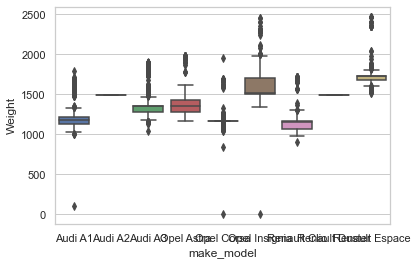

In [25]:
sns.boxplot(y='Weight',data=df, x='make_model')

In [26]:
df[df['Weight']<500]

,make_model,body_type,price,vat,km,age,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,CO2 Emission(g CO2/km),Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,upholstery_material,Consumption_combined,Consumption_city,Consumption_country
1143,Audi A1,Compact,19229,VAT deductible,8263.0,1.0,1.0,70.0,Used,Yes,36.0,Beige,Metallic,"['\nCloth, Black\n']",5.0,4.0,Automatic,999.0,3.0,102.0,front,Benzine,102.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'CD player', 'Hands-free equipme...","['Alloy wheels', 'Catalytic Converter', 'Sport...","['ABS', 'Central door lock', 'Daytime running ...",7.0,Cloth,4.6,5.6,4.0
8355,Opel Corsa,Compact,12945,VAT undeductible,2015.0,1.0,1.0,66.0,Used,Yes,0.0,Silver,Metallic,"['\nCloth, Black\n']",5.0,5.0,Automatic,1398.0,4.0,1.0,front,Benzine,112.0,Euro 6,"['Air conditioning', 'Electrical side mirrors'...",['Radio'],['Catalytic Converter'],"['ABS', 'Central door lock', 'Daytime running ...",5.0,Cloth,4.8,5.8,4.1
12779,Opel Insignia,Station wagon,39299,VAT deductible,10.0,0.0,1.0,121.0,New,No,0.0,Black,Metallic,"['\nCloth, Black\n']",5.0,5.0,Manual,1500.0,4.0,1.0,front,Benzine,140.0,Euro 6,"['Heated steering wheel', 'Hill Holder', 'Park...",NaN,NaN,"['Fog lights', 'Lane departure warning system']",6.0,Cloth,6.0,NaN,NaN


In [27]:
df[df['make_model'] == 'Audi A1']['Weight'].mean()

1203.0543228768172

In [102]:
df.loc[1143, 'Weight(kg)'] = 1202

In [28]:
df[df['make_model'] == 'Opel Corsa']['Weight'].mean()

1169.7093862815884

In [103]:
df.loc[8355, 'Weight(kg)'] = 1169

In [30]:
df[df['make_model'] == 'Opel Insignia']['Weight'].mean()

1590.7613548883758

In [104]:
df.loc[12779, 'Weight(kg)'] = 1508

* weight values less than 600 were converted

### Column: CO2 Emission(g CO2/km)

<AxesSubplot:xlabel='make_model', ylabel='CO2 Emission(g CO2/km)'>

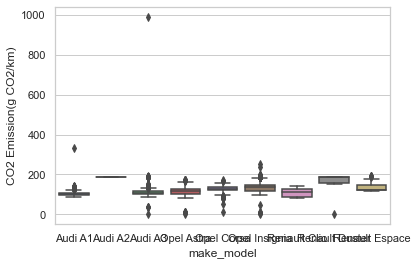

In [31]:
sns.boxplot(y='CO2 Emission(g CO2/km)',data=df, x='make_model')

In [32]:
df[df['CO2 Emission(g CO2/km)']>300]

,make_model,body_type,price,vat,km,age,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,CO2 Emission(g CO2/km),Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,upholstery_material,Consumption_combined,Consumption_city,Consumption_country
535,Audi A1,Compact,12990,VAT undeductible,41200.0,3.0,1.0,70.0,Used,Yes,0.0,Silver,Metallic,"['\nCloth, Black\n']",5.0,5.0,Manual,999.0,4.0,1135.0,front,Benzine,331.0,Euro 4,"['Air conditioning', 'Automatic climate contro...",NaN,"['Ski bag', 'Sport suspension']","['ABS', 'Alarm system', 'Central door lock', '...",5.0,Cloth,13.0,19.0,10.0
4556,Audi A3,Sedans,23500,VAT deductible,27815.0,1.0,1.0,81.0,Used,No,0.0,Grey,Metallic,"['\nOther, Other\n']",5.0,5.0,Automatic,1598.0,4.0,1360.0,front,Diesel,990.0,Euro 6,"['Multi-function steering wheel', 'Park Distan...",['Bluetooth'],NaN,"['ABS', 'Central door lock', 'Power steering',...",7.0,Other,38.0,43.0,35.0


In [33]:
df.loc[[535, 4556], 'CO2 Emission(g CO2/km)'] = np.nan

In [34]:
df[df['CO2 Emission(g CO2/km)']<70]

,make_model,body_type,price,vat,km,age,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,CO2 Emission(g CO2/km),Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,upholstery_material,Consumption_combined,Consumption_city,Consumption_country
3612,Audi A3,Sedans,38450,Price negotiable,13800.0,1.0,1.0,110.0,Used,No,0.0,Black,Metallic,"['\nCloth, Black\n']",5.0,5.0,Semi-automatic,1395.0,4.0,1615.0,front,Benzine,36.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'CD player', 'Digital radio', 'H...","['Alloy wheels', 'Sport package', 'Sport seats...","['ABS', 'Adaptive Cruise Control', 'Alarm syst...",6.0,Cloth,1.60,NaN,NaN
3615,Audi A3,Sedans,35899,VAT undeductible,20880.0,1.0,1.0,110.0,Used,No,0.0,White,Metallic,NaN,5.0,5.0,Semi-automatic,1395.0,4.0,1615.0,front,Benzine,36.0,Euro 6,"['Air conditioning', 'Power windows', 'Seat ve...","['Bluetooth', 'Radio']",['Alloy wheels'],"['ABS', 'Adaptive Cruise Control', 'Alarm syst...",6.0,NaN,1.60,NaN,NaN
3617,Audi A3,Sedans,38000,Price negotiable,12000.0,1.0,1.0,110.0,Used,No,0.0,Grey,Metallic,"['\nPart leather, Grey\n']",5.0,5.0,Semi-automatic,1395.0,4.0,1615.0,front,Benzine,36.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'CD player', 'Digital radio', 'H...","['Alloy wheels', 'Shift paddles', 'Sport packa...","['ABS', 'Adaptive Cruise Control', 'Adaptive h...",6.0,Part leather,1.60,NaN,NaN
4089,Audi A3,Sedans,19500,VAT deductible,23644.0,1.0,1.0,85.0,Used,No,0.0,Blue,Metallic,"['\nOther, Other\n']",5.0,5.0,Manual,1598.0,4.0,1360.0,front,Diesel,1.0,Euro 6,NaN,"['Bluetooth', 'On-board computer']",NaN,"['ABS', 'Central door lock', 'Power steering',...",6.0,Other,40.00,45.0,37.0
5818,Opel Astra,Sedans,14990,VAT deductible,85182.0,3.0,1.0,110.0,Used,No,0.0,Brown,Metallic,"['\nCloth, Black\n']",5.0,5.0,Automatic,1399.0,4.0,1278.0,front,Benzine,12.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'Hands-free equipment', 'MP3', '...","['Alloy wheels', 'Catalytic Converter']","['ABS', 'Central door lock', 'Daytime running ...",6.0,Cloth,5.10,6.3,4.3
6397,Opel Astra,Sedans,6950,VAT undeductible,88000.0,0.0,1.0,81.0,Used,No,0.0,Grey,Metallic,NaN,5.0,5.0,Manual,1700.0,4.0,1425.0,front,Diesel,5.0,Euro 6,"['Air conditioning', 'Leather steering wheel',...",['CD player'],['Alloy wheels'],"['ABS', 'Central door lock', 'Driver-side airb...",6.0,NaN,4.50,5.0,4.0
6578,Opel Astra,Station wagon,17850,VAT deductible,29900.0,1.0,1.0,110.0,Used,Yes,0.0,Green,Metallic,"['\nCloth, Black\n']",5.0,5.0,Automatic,1399.0,4.0,1278.0,front,Benzine,12.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Catalytic Converter', 'Roof ...","['ABS', 'Central door lock', 'Daytime running ...",6.0,Cloth,5.10,6.3,4.3
6579,Opel Astra,Station wagon,17850,VAT deductible,29900.0,1.0,1.0,110.0,Used,Yes,0.0,Green,Metallic,"['\nCloth, Black\n']",5.0,5.0,Automatic,1399.0,4.0,1278.0,front,Benzine,12.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Catalytic Converter', 'Roof ...","['ABS', 'Central door lock', 'Daytime running ...",6.0,Cloth,5.10,6.3,4.3
8110,Opel Astra,Station wagon,18380,VAT deductible,1020.0,0.0,1.0,77.0,Used,Yes,60.0,Silver,Metallic,"['\nCloth, Black\n']",5.0,5.0,Manual,999.0,3.0,1273.0,front,Benzine,14.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'Digital radio', 'Hands-free equ...",['Alloy wheels'],"['ABS', 'Central door lock', 'Daytime running ...",5.0,Cloth,5.00,5.9,4.5
8217,Opel Astra,Sedans,17850,VAT deductible,4500.0,0.0,1.0,92.0,Employee's car,Yes,0.0,Red,Metallic,"['\nCloth, Black\n']",5.0,5.0,Manual,1399.0,4.0,1278.0,front,Benzine,0.0,Euro 6,"['Air conditioning', 'A

In [35]:
df.loc[df[df['CO2 Emission(g CO2/km)']<70].index, 'CO2 Emission(g CO2/km)'] = np.nan

In [36]:
df['CO2 Emission(g CO2/km)'].isnull().sum()

21

In [37]:
mode_CO2 = df.groupby(['make_model','Displacement'])['CO2 Emission(g CO2/km)']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df['CO2 Emission(g CO2/km)'] = df['CO2 Emission(g CO2/km)'].fillna(mode_CO2)
mode_CO2_1 = df.groupby(['make_model'])['CO2 Emission(g CO2/km)']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df['CO2 Emission(g CO2/km)'] = df['CO2 Emission(g CO2/km)'].fillna(mode_CO2_1)
mode_CO2_2 = df.groupby(['body_type'])['CO2 Emission(g CO2/km)']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df['CO2 Emission(g CO2/km)'] = df['CO2 Emission(g CO2/km)'].fillna(mode_CO2_2)

* Emission values less than 70 and greater than 300 were converted to null and then filled according to the columns make_model and displacement

### Column: Gears

In [117]:
df.Gears.value_counts(dropna=False)

6.0    8614
5.0    4254
7.0    2810
8.0     224
9.0       6
4.0       2
1.0       2
3.0       2
2.0       1
Name: Gears, dtype: int64

In [119]:
df.loc[df[df['Gears']<5].index, 'Gears'] = 5

* the gear values less than 5 were assigned as 5.

### Column: Consumption_combined

<AxesSubplot:xlabel='make_model', ylabel='Consumption_combined'>

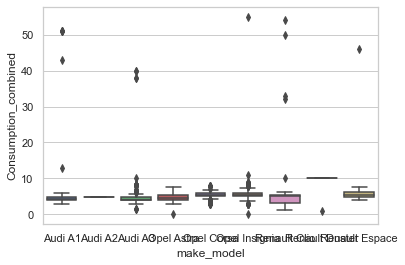

In [40]:
sns.boxplot(y='Consumption_combined',data=df, x='make_model')

In [41]:
df.loc[(df['Consumption_combined']>20)|(df['Consumption_combined']<3), 'Consumption_combined'] = np.nan

In [42]:
df['Consumption_combined'].isnull().sum()

22

In [43]:
mode_Cons= df.groupby(['CO2 Emission(g CO2/km)'])['Consumption_combined']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df['Consumption_combined'] = df['Consumption_combined'].fillna(mode_Cons)
mode_Cons1= df.groupby(['Displacement'])['Consumption_combined']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df['Consumption_combined'] = df['Consumption_combined'].fillna(mode_Cons1)
mode_Cons2= df.groupby(['make_model'])['Consumption_combined']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df['Consumption_combined'] = df['Consumption_combined'].fillna(mode_Cons2)

In [44]:
df['Consumption_combined'].isnull().sum()

0

<AxesSubplot:xlabel='make_model', ylabel='Consumption_combined'>

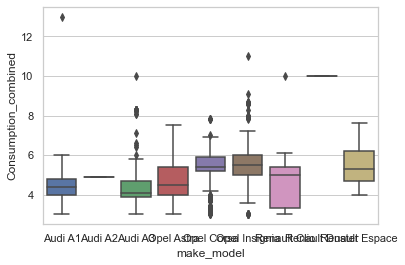

In [45]:
sns.boxplot(y='Consumption_combined',data=df, x='make_model')

* consumption_comb values greater than 20 and less than 3 were converted to null and then filled according to the columns displacement and make_model

### Some Additional Changes in Type Column

In [47]:
df[(df.Type == 'New') & (df['km']>10000)]

,make_model,body_type,price,vat,km,age,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,CO2 Emission(g CO2/km),Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,upholstery_material,Consumption_combined,Consumption_city,Consumption_country
15503,Renault Espace,Van,32498,VAT deductible,13495.0,1.0,1.0,118.0,New,No,24.0,White,Metallic,"['\nFull leather, Other\n']",5.0,7.0,Automatic,1598.0,4.0,1734.0,front,Diesel,120.0,Euro 6,"['Air conditioning', 'Automatic climate contro...",['On-board computer'],NaN,"['ABS', 'Central door lock', 'Electronic stabi...",6.0,Full leather,5.4,NaN,NaN


In [48]:
df[(df.km > 1000) & (df.Type == 'New')]

,make_model,body_type,price,vat,km,age,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,CO2 Emission(g CO2/km),Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,upholstery_material,Consumption_combined,Consumption_city,Consumption_country
9887,Opel Corsa,Compact,17490,VAT deductible,2500.0,0.0,1.0,66.0,New,Yes,0.0,White,Metallic,"['\nCloth, Black\n']",5.0,5.0,Automatic,1398.0,4.0,1237.0,front,Benzine,120.0,Euro 6,"['Air conditioning', 'Cruise control', 'Electr...","['Bluetooth', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Touch screen']","['ABS', 'Central door lock', 'Daytime running ...",6.0,Cloth,5.2,6.8,4.3
9933,Opel Corsa,Other,17250,VAT deductible,3000.0,0.0,1.0,66.0,New,No,0.0,Grey,Metallic,"['\nCloth, Black\n']",5.0,5.0,Automatic,1398.0,4.0,1199.0,front,Benzine,140.0,Euro 6,"['Air conditioning', 'Cruise control', 'Electr...","['On-board computer', 'Radio']","['Alloy wheels', 'Catalytic Converter']","['ABS', 'Central door lock', 'Daytime running ...",6.0,Cloth,6.0,7.8,4.9
10043,Opel Corsa,Other,15950,VAT deductible,3000.0,0.0,1.0,66.0,New,No,0.0,Blue,Metallic,"['\nCloth, Black\n']",5.0,5.0,Automatic,1398.0,4.0,1199.0,front,Benzine,140.0,Euro 6,"['Air conditioning', 'Automatic climate contro...","['Bluetooth', 'Hands-free equipment', 'MP3', '...","['Alloy wheels', 'Catalytic Converter', 'Touch...","['ABS', 'Central door lock', 'Daytime running ...",6.0,Cloth,6.0,7.8,4.9
15299,Renault Espace,Sedans,46895,VAT deductible,3000.0,0.0,1.0,147.0,New,No,0.0,Black,Metallic,"['\nPart leather, Brown\n']",5.0,7.0,Manual,1997.0,4.0,2044.0,front,Diesel,172.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'Digital radio', 'Hands-free equ...","['Alloy wheels', 'Touch screen', 'Voice Control']","['ABS', 'Blind spot monitor', 'Central door lo...",6.0,Part leather,5.4,6.3,4.9
15503,Renault Espace,Van,32498,VAT deductible,13495.0,1.0,1.0,118.0,New,No,24.0,White,Metallic,"['\nFull leather, Other\n']",5.0,7.0,Automatic,1598.0,4.0,1734.0,front,Diesel,120.0,Euro 6,"['Air conditioning', 'Automatic climate contro...",['On-board computer'],NaN,"['ABS', 'Central door lock', 'Electronic stabi...",6.0,Full leather,5.4,NaN,NaN
15821,Renault Espace,Station wagon,50950,VAT deductible,2000.0,0.0,1.0,147.0,New,No,0.0,Black,Metallic,"['\nOther, Other\n']",5.0,7.0,Automatic,1997.0,4.0,1840.0,front,Diesel,168.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'Digital radio', 'Hands-free equ...","['Alloy wheels', 'Touch screen']","['ABS', 'Central door lock', 'Daytime running ...",6.0,Other,5.7,6.1,5.3
15884,Renault Espace,Station wagon,42990,VAT deductible,2000.0,0.0,1.0,165.0,New,No,0.0,Grey,Metallic,"['\nFull leather, Brown\n']",4.0,5.0,Automatic,1798.0,4.0,1685.0,front,Benzine,168.0,Euro 6,"['Air conditioning', 'Automatic climate contro...","['Bluetooth', 'Digital radio', 'Hands-free equ...","['Alloy wheels', 'Voice Control']","['ABS', 'Adaptive Cruise Control', 'Blind spot...",6.0,Full leather,7.4,9.2,6.3
15890,Renault Espace,Station wagon,42490,VAT deductible,2000.0,0.0,1.0,147.0,New,No,0.0,Black,Metallic,"['\nCloth, Other\n']",5.0,6.0,Automatic,1997.0,4.0,1840.0,front,Diesel,168.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Touch screen']","['ABS', 'Blind spot monitor', 'Central door lo...",6.0,Cloth,5.7,6.1,5.3
15902,Renault Espace,Sedans,41043,VAT deductible,3000.0,0.0,1.0,147.0,New,No,0.0,Black,Metallic,['\nBrown\n'],4.0,5.0,Automatic,1997.0,4.0,1758.0,front,Diesel,139.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'Digital radio', 'Hands-free equ...","['Alloy wheels', 'Roof rack', 'Touch screen', ...","['ABS', 'Blind spot monitor', 'Central door lo...",6.0,NaN,5.3,6.2,4.7


In [50]:
df.loc[df[(df.age > 0) & (df.Type == 'New')].index, 'Type'] = 'Used'

## Filled data was saved to a csv file called "Capstone_stage3.csv"

In [51]:
df.to_csv('Capstone_stage3.csv', index = False)